# Ajuste dos Dados

Div = League Division

Date = Match Date (dd/mm/yy)

Time = Time of match kick off

HomeTeam = Home Team

AwayTeam = Away Team

FTHG and HG = Full Time Home Team Goals

FTAG and AG = Full Time Away Team Goals

FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)

HS = Home Team Shots

AS = Away Team Shots


In [ ]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

#Ler todos os arquivos e juntar em apenas um csv
'''
dir_path = 'drive/MyDrive/TCC/Dataset'

folders = [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]

all_files = []

for folder in folders:
    folder_path = os.path.join(dir_path, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    csv_files = [os.path.join(folder_path, f) for f in csv_files]
    all_files.extend(csv_files)

df = pd.concat((pd.read_csv(f, encoding='latin1') for f in all_files), ignore_index=True)

df.to_csv('drive/MyDrive/TCC/Dataset/all.csv', index=False)
'''

"\ndir_path = 'drive/MyDrive/TCC/Dataset'\n\nfolders = [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]\n\nall_files = []\n\nfor folder in folders:\n    folder_path = os.path.join(dir_path, folder)\n    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]\n    csv_files = [os.path.join(folder_path, f) for f in csv_files]\n    all_files.extend(csv_files)\n\ndf = pd.concat((pd.read_csv(f, encoding='latin1') for f in all_files), ignore_index=True)\n\ndf.to_csv('drive/MyDrive/TCC/Dataset/all.csv', index=False)\n"

In [ ]:
data = pd.read_csv('drive/MyDrive/TCC/Dataset/all.csv', low_memory=False)

# Separar as colunas que serão utilizadas no modelo
cols = ["Div", "Date","HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HS", "AS"]
data = data[cols]

#separando em um novo dataset, garantindo ter apenas informações da Premier League
data = data.loc[data['Div'] == 'E0']

In [ ]:
data.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS
4522,E0,07/05/2023,Newcastle,Arsenal,0.0,2.0,A,12.0,10.0
4523,E0,07/05/2023,West Ham,Man United,1.0,0.0,H,15.0,19.0
4524,E0,08/05/2023,Fulham,Leicester,5.0,3.0,H,17.0,18.0
4525,E0,08/05/2023,Brighton,Everton,1.0,5.0,A,23.0,10.0
4526,E0,08/05/2023,Nott'm Forest,Southampton,4.0,3.0,H,9.0,19.0


In [ ]:
data.dropna(subset=["Div", "Date","HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HS", "AS" ], inplace=True)

In [ ]:
#Deixar as datas no mesmo formato : dayfirst(dia primeiro)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [ ]:
#ordenar por data
data = data.sort_values(by='Date', ascending=True)

In [ ]:
data = pd.DataFrame(data)
data = data.reset_index()
data = data.rename(columns = {"index": "Game_id"})
data["Game_id"] = data.index + 1

In [ ]:
# Mapear valores HTR para H=0, D=1, A=2
htr_map = {'H': 0, 'D': 1, 'A': 2}
data['FTR'] = data['FTR'].map(htr_map)

data["FTR"] = data["FTR"].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Aplicar o LabelEncoder para transformar os nomes dos clubes em números inteiros
le = LabelEncoder()
data['HomeTeam_id'] = le.fit_transform(data['HomeTeam'])
data['AwayTeam_id'] = le.fit_transform(data['AwayTeam'])

In [ ]:
data.tail()

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HomeTeam_id,AwayTeam_id
4522,4523,E0,2023-05-07,Newcastle,Arsenal,0.0,2.0,2,12.0,10.0,21,0
4523,4524,E0,2023-05-07,West Ham,Man United,1.0,0.0,0,15.0,19.0,34,19
4524,4525,E0,2023-05-08,Brighton,Everton,1.0,5.0,2,23.0,10.0,6,11
4525,4526,E0,2023-05-08,Fulham,Leicester,5.0,3.0,0,17.0,18.0,12,16
4526,4527,E0,2023-05-08,Nott'm Forest,Southampton,4.0,3.0,0,9.0,19.0,23,27


In [ ]:
# Adicionando a coluna temporada com as temporadas
import datetime

data["Season"] = 0
data["Season"] = data["Season"].astype(int)

# Percorre as linhas do DataFrame e adiciona a temporada correspondente
for index, row in data.iterrows():
    date = row["Date"]
    year = date.year
    if date >= datetime.datetime(year, 8, 1):
        season = year
    else:
        season = year - 1
    data.at[index, "Season"] = season

data.tail()

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HomeTeam_id,AwayTeam_id,Season
4522,4523,E0,2023-05-07,Newcastle,Arsenal,0.0,2.0,2,12.0,10.0,21,0,2022
4523,4524,E0,2023-05-07,West Ham,Man United,1.0,0.0,0,15.0,19.0,34,19,2022
4524,4525,E0,2023-05-08,Brighton,Everton,1.0,5.0,2,23.0,10.0,6,11,2022
4525,4526,E0,2023-05-08,Fulham,Leicester,5.0,3.0,0,17.0,18.0,12,16,2022
4526,4527,E0,2023-05-08,Nott'm Forest,Southampton,4.0,3.0,0,9.0,19.0,23,27,2022


In [ ]:
#Clubes que subiram separados por temporada
data["HomePromoted"] = 0

data["AwayPromoted"] = 0

# cria um dicionário com os dados dos clubes que subiram em cada temporada
dataPrometed = {
    '2011': ['QPR', 'Norwich', 'Swansea'],
    '2012': ['Reading', 'Southampton', 'West Ham'],
    '2013': ['Cardiff', 'Hull', 'Crystal Palace'],
    '2014': ['Leicester', 'Burnley', 'QPR'],
    '2015': ['Watford', 'Bournemouth', 'Norwich'],
    '2016': ['Burnley', 'Hull', 'Middlesbrough'],
    '2017': ['Newcastle', 'Brighton', 'Huddersfield'],
    '2018': ['Wolves', 'Cardiff', 'Fulham'],
    '2019': ['Norwich', 'Sheffield United', 'Aston Villa'],
    '2020': ['Leeds', 'West Brom', 'Fulham'],
    '2021': ['Norwich', 'Watford', 'Brentford'],
    '2022': ['Fulham', 'Bournemouth', "Nott'm Forest"]
}

# Para cada jogo, verificar se o time da casa ou o visitante está no dicionário de clubes promovidos
for i, row in data.iterrows():
    if row['HomeTeam'] in dataPrometed.get(str(row['Season']), []):
        data.at[i, 'HomePromoted'] = 1
    if row['AwayTeam'] in dataPrometed.get(str(row['Season']), []):
        data.at[i, 'AwayPromoted'] = 1

data.head()

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HomeTeam_id,AwayTeam_id,Season,HomePromoted,AwayPromoted
0,1,E0,2011-08-13,QPR,Bolton,0.0,4.0,2,13.0,13.0,24,3,2011,1,0
1,2,E0,2011-08-13,Liverpool,Sunderland,1.0,1.0,1,11.0,15.0,17,29,2011,0,0
2,3,E0,2011-08-13,Newcastle,Arsenal,0.0,0.0,1,6.0,9.0,21,0,2011,0,0
3,4,E0,2011-08-13,Blackburn,Wolves,1.0,2.0,2,16.0,13.0,2,36,2011,0,0
4,5,E0,2011-08-13,Wigan,Norwich,1.0,1.0,1,18.0,13.0,35,22,2011,0,1


In [ ]:
temporadas = data['Season'].value_counts().index.sort_values().values

for temporada in temporadas:
    equipes_temporada = {}

    for id in data["HomeTeam_id"].unique():
        equipes_temporada[id] = {"vitorias": 0, "derrotas": 0, "empates": 0, "last_vitorias": 0, 
                                 "last_derrotas": 0, "last_empates": 0, "gols": 0, "last_gols": 0,
                                 "gols_levados": 0, "last_gols_levados": 0, "chutes_gol":0, "last_chutes_gol": 0,
                                 "quant_partidas": 0, "last_quant_part": 0, "round": 0}
    round = 1;
    count = 0; 

    dft = data[data['Season'] == temporada]

    for index, row in dft.iterrows():

        if count == 10:
          count = 0
          round +=1

        count += 1;

        home_team_id = row["HomeTeam_id"]
        away_team_id = row["AwayTeam_id"]

        home_team = equipes_temporada[home_team_id]
        away_team = equipes_temporada[away_team_id]

        # Atualiza o número de vitórias, derrotas e empates para a equipe da casa
        if row["FTR"] == 0:
            home_team["vitorias"] = home_team["last_vitorias"]
            away_team["derrotas"] = away_team["last_derrotas"]
            home_team["last_vitorias"] += 1
            away_team["last_derrotas"] += 1
        elif row["FTR"] == 2:
            home_team["derrotas"] = home_team["last_derrotas"]
            away_team["vitorias"] = away_team["last_vitorias"]
            home_team["last_derrotas"] += 1
            away_team["last_vitorias"] += 1
        else:
            home_team["empates"] = home_team["last_empates"]
            away_team["empates"] = away_team["last_empates"]
            home_team["last_empates"] += 1
            away_team["last_empates"] += 1
          
        home_team["gols"] = home_team["last_gols"]
        away_team["gols"] = away_team["last_gols"]
        home_team["last_gols"] += row["FTHG"]
        away_team["last_gols"] += row["FTAG"]

        home_team["gols_levados"] = home_team["last_gols_levados"]
        away_team["gols_levados"] = away_team["last_gols_levados"]
        home_team["last_gols_levados"] += row["FTAG"]
        away_team["last_gols_levados"] += row["FTHG"]

        home_team["chutes_gol"] = home_team["last_chutes_gol"]
        away_team["chutes_gol"] = away_team["last_chutes_gol"]
        home_team["last_chutes_gol"] += row["HS"]
        away_team["last_chutes_gol"] += row["AS"]

        home_team["quant_partidas"] = home_team["last_quant_part"]
        away_team["quant_partidas"] = away_team["last_quant_part"]
        home_team["last_quant_part"] += 1
        away_team["last_quant_part"] += 1

        # Adiciona as informações atualizadas ao dicionário de equipes da temporada
        equipes_temporada[home_team_id] = home_team
        equipes_temporada[away_team_id] = away_team

        # Atualiza o dataframe com as informações de vitórias, derrotas e empates da rodada
        data.at[index, 'Wins_Home_Team'] = home_team["vitorias"]
        data.at[index, 'Wins_Away_Team'] = away_team["vitorias"]

        data.at[index, 'Loss_Home_Team'] = home_team["derrotas"]
        data.at[index, 'Loss_Away_Team'] = away_team["derrotas"]

        data.at[index, 'Draw_Home_Team'] = home_team["empates"]
        data.at[index, 'Draw_Away_Team'] = away_team["empates"]

        data.at[index, 'Goals_Home_Team'] = home_team["gols"]
        data.at[index, 'Goals_Away_Team'] = away_team["gols"]

        data.at[index, 'Conceded_Goals_Home_Team'] = home_team["gols_levados"]
        data.at[index, 'Conceded_Goals_Away_Team'] = away_team["gols_levados"]

        data.at[index, 'Shots_Home_Team'] = home_team["chutes_gol"]
        data.at[index, 'Shots_Away_Team'] = away_team["chutes_gol"]

        data.at[index, 'Matches_Home_Team'] = home_team["quant_partidas"]
        data.at[index, 'Matches_Away_Team'] = away_team["quant_partidas"]

        data.at[index, 'Round'] =  str(temporada) + "/" + str('{:02d}'.format(round));

In [ ]:
# Média de gols da euipe na temporada
data = data.assign(avg_goals_home_team = data['Goals_Home_Team'] / data['Matches_Home_Team'],
                   avg_goals_away_team = data['Goals_Away_Team'] / data['Matches_Away_Team'],
                   avg_conceded_home_team = data['Conceded_Goals_Home_Team'] / data['Matches_Home_Team'],
                   avg_conceded_away_team = data['Conceded_Goals_Away_Team'] / data['Matches_Away_Team'])

In [ ]:
data.loc[:, 'avg_goals_home_team'] = data['avg_goals_home_team'].fillna(0)
data.loc[:, 'avg_goals_away_team'] = data['avg_goals_away_team'].fillna(0)
data.loc[:, 'avg_conceded_home_team'] = data['avg_conceded_home_team'].fillna(0)
data.loc[:, 'avg_conceded_away_team'] = data['avg_conceded_away_team'].fillna(0)

In [ ]:
df_subset = data[['HomeTeam', 'AwayTeam', 'Round', 'Wins_Home_Team', 'Wins_Away_Team', 
                  'Loss_Home_Team', 'Loss_Away_Team', 'Draw_Home_Team', 'Draw_Away_Team',
                  'Goals_Home_Team', 'Goals_Away_Team', 'Shots_Home_Team', 'Shots_Away_Team',
                  'Conceded_Goals_Home_Team', 'Conceded_Goals_Away_Team']]
df_subset.tail(10000)

,HomeTeam,AwayTeam,Round,Wins_Home_Team,Wins_Away_Team,Loss_Home_Team,Loss_Away_Team,Draw_Home_Team,Draw_Away_Team,Goals_Home_Team,Goals_Away_Team,Shots_Home_Team,Shots_Away_Team,Conceded_Goals_Home_Team,Conceded_Goals_Away_Team
0,QPR,Bolton,2011/01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Liverpool,Sunderland,2011/01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Newcastle,Arsenal,2011/01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Blackburn,Wolves,2011/01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Wigan,Norwich,2011/01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,Newcastle,Arsenal,2022/35,17.0,24.0,4.0,3.0,10.0,5.0,61.0,81.0,483.0,544.0,27.0,39.0
4523,West Ham,Man United,2022/35,9.0,18.0,17.0,8.0,6.0,5.0,37.0,49.0,420.0,487.0,50.0,40.0
4524,Brighton,Everton,2022/35,15.0,6.0,9.0,16.0,6.0,10.0,62.0,27.0,515.0,380.0,40.0,52.0
4525,Fulham,Leicester,2022/35,13.0,7.0,14.0,20.0,5.0,5.0,45.0,46.0,382.0,381.0,46.0,59.0


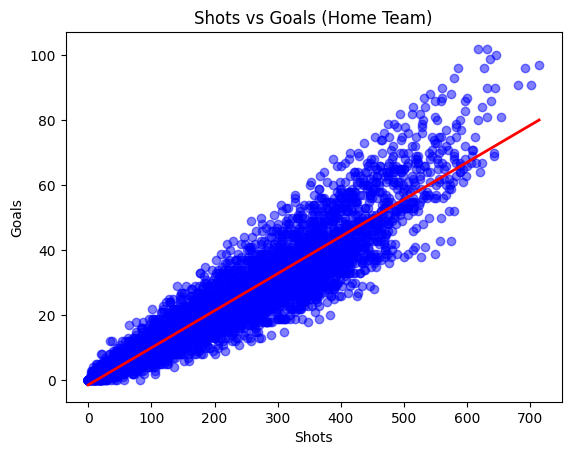

In [ ]:
# criar o gráfico de dispersão
plt.scatter(df_subset['Shots_Home_Team'], df_subset['Goals_Home_Team'], c='blue', alpha=0.5)

# ajustar uma linha polinomial de ordem 1 (linha reta) aos dados
coefficients = np.polyfit(df_subset['Shots_Home_Team'], df_subset['Goals_Home_Team'], 1)
polynomial = np.poly1d(coefficients)

# criar pontos x para traçar a linha de tendência
x = np.linspace(df_subset['Shots_Home_Team'].min(), df_subset['Shots_Home_Team'].max(), 100)

# plotar a linha de tendência
plt.plot(x, polynomial(x), color='red', linewidth=2)

# adicionar título e rótulos dos eixos
plt.title('Shots vs Goals (Home Team)')
plt.xlabel('Shots')
plt.ylabel('Goals')

# exibir o gráfico
plt.show()


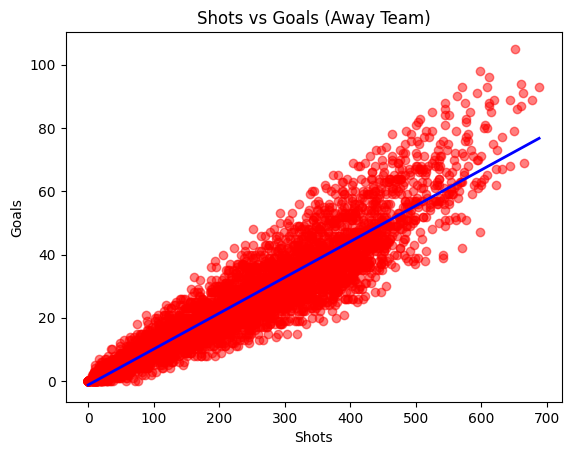

In [ ]:
# criar o gráfico de dispersão
plt.scatter(df_subset['Shots_Away_Team'], df_subset['Goals_Away_Team'], c='red', alpha=0.5)

# ajustar uma linha polinomial de ordem 1 (linha reta) aos dados
coefficients = np.polyfit(df_subset['Shots_Away_Team'], df_subset['Goals_Away_Team'], 1)
polynomial = np.poly1d(coefficients)

# criar pontos x para traçar a linha de tendência
x = np.linspace(df_subset['Shots_Away_Team'].min(), df_subset['Shots_Away_Team'].max(), 100)

# plotar a linha de tendência
plt.plot(x, polynomial(x), color='blue', linewidth=2)

# adicionar título e rótulos dos eixos
plt.title('Shots vs Goals (Away Team)')
plt.xlabel('Shots')
plt.ylabel('Goals')

# exibir o gráfico
plt.show()

In [ ]:
# cria uma lista para as entradas (X)
X = data[['HomeTeam_id', 'AwayTeam_id', 'Wins_Home_Team', 'Wins_Away_Team', 'Loss_Home_Team', 'Loss_Away_Team',
          'Draw_Home_Team', 'Draw_Away_Team', 'Goals_Home_Team', 'Goals_Away_Team', 'Shots_Home_Team', 'Shots_Away_Team',
          'Conceded_Goals_Home_Team', 'Conceded_Goals_Away_Team', 'Matches_Home_Team', 'Matches_Away_Team', 'HomePromoted', 'AwayPromoted']].values

# cria uma lista para as saídas (Y)
Y = data['FTR'].values

In [ ]:
data.tail(1000)

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,Conceded_Goals_Away_Team,Shots_Home_Team,Shots_Away_Team,Matches_Home_Team,Matches_Away_Team,Round,avg_goals_home_team,avg_goals_away_team,avg_conceded_home_team,avg_conceded_away_team
3527,3528,E0,2020-12-11,Leeds,West Ham,1.0,2.0,2,13.0,19.0,...,14.0,161.0,137.0,11.0,11.0,2020/11,1.454545,1.636364,1.818182,1.272727
3528,3529,E0,2020-12-12,Everton,Chelsea,1.0,0.0,0,9.0,10.0,...,11.0,129.0,155.0,11.0,11.0,2020/11,1.818182,2.272727,1.636364,1.000000
3529,3530,E0,2020-12-12,Wolves,Aston Villa,0.0,1.0,2,16.0,13.0,...,13.0,131.0,135.0,11.0,9.0,2020/11,1.000000,2.222222,1.363636,1.444444
3530,3531,E0,2020-12-12,Newcastle,West Brom,2.0,1.0,0,12.0,13.0,...,23.0,86.0,104.0,10.0,11.0,2020/12,1.200000,0.727273,1.500000,2.090909
3531,3532,E0,2020-12-12,Man United,Man City,0.0,0.0,1,11.0,9.0,...,11.0,135.0,160.0,10.0,10.0,2020/12,1.900000,1.700000,1.700000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,4523,E0,2023-05-07,Newcastle,Arsenal,0.0,2.0,2,12.0,10.0,...,39.0,483.0,544.0,33.0,34.0,2022/35,1.848485,2.382353,0.818182,1.147059
4523,4524,E0,2023-05-07,West Ham,Man United,1.0,0.0,0,15.0,19.0,...,40.0,420.0,487.0,34.0,33.0,2022/35,1.088235,1.484848,1.470588,1.212121
4524,4525,E0,2023-05-08,Brighton,Everton,1.0,5.0,2,23.0,10.0,...,52.0,515.0,380.0,32.0,34.0,2022/35,1.937500,0.794118,1.250000,1.529412
4525,4526,E0,2023-05-08,Fulham,Leicester,5.0,3.0,0,17.0,18.0,...,59.0,382.0,381.0,34.0,34.0,2022/35,1.323529,1.352941,1.352941,1.735294


Separar o Game_id para futura comparação e divide os dados em conjuntos de treinamento e teste

In [ ]:
Game_id = data[['Game_id', 'HomeTeam', 'AwayTeam', 'Round']]

from sklearn.model_selection import train_test_split

game_id_train, game_id_test = train_test_split(Game_id, test_size=0.08, shuffle=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.08, shuffle=False)

# Normalização

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Normalizar os dados
scaler = MinMaxScaler()

X_train_scaler = scaler.fit_transform(X_train)

X_test_scaler = scaler.transform(X_test)

# Contruindo Rede

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

mlp.fit(X_train_scaler, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [ ]:
print("Número total de camadas:", mlp.n_layers_)
print("Número de neurônios na camada de entrada:", X_train_scaler.shape[1])
print("Número de neurônios em cada camada oculta:", list(mlp.hidden_layer_sizes)[0])
print("Número de neurônios na camada de saída:", mlp.n_outputs_)

Número total de camadas: 3
Número de neurônios na camada de entrada: 18
Número de neurônios em cada camada oculta: 100
Número de neurônios na camada de saída: 3


In [ ]:
# Obter as previsões no conjunto de teste
Y_pred = mlp.predict(X_test_scaler)

# Converter as previsões e os resultados reais em uma única dimensão
Y_test_flat = Y_test.flatten()
Y_pred_flat = Y_pred.flatten()

In [ ]:
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score

lr_acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average = 'micro')

print('Regressão Logística')
print('')
print('Acurácia: {:.2f}%'.format(lr_acc*100))
print('F1 Score: {:.2f}%'.format(f1*100))
print('Train score: {:.2f}%'.format(mlp.score(X_train_scaler, Y_train)*100))

Regressão Logística

Acurácia: 68.87%
F1 Score: 68.87%
Train score: 67.20%


In [ ]:
# Criar um DataFrame com as informações
df = pd.DataFrame({'Round': game_id_test['Round'], 'Game_id': game_id_test['Game_id'], 'HomeTeam': game_id_test['HomeTeam'], 'AwayTeam': game_id_test['AwayTeam'], 'Real': Y_test_flat, 'Predicted': Y_pred_flat})

df.tail(1000)

,Round,Game_id,HomeTeam,AwayTeam,Real,Predicted
4164,2021/37,4165,Leeds,Brighton,1,1
4165,2021/37,4166,Newcastle,Arsenal,0,2
4166,2021/37,4167,Southampton,Liverpool,2,1
4167,2021/37,4168,Everton,Crystal Palace,0,0
4168,2021/37,4169,Aston Villa,Burnley,1,2
...,...,...,...,...,...,...
4522,2022/35,4523,Newcastle,Arsenal,2,2
4523,2022/35,4524,West Ham,Man United,0,2
4524,2022/35,4525,Brighton,Everton,2,0
4525,2022/35,4526,Fulham,Leicester,0,0


In [ ]:
# Adicionar coluna 'Match'
df['Match'] = df['Real'] == df['Predicted']

# Calcular porcentagem de acertos
accuracy = df['Match'].mean() * 100

print(f"A porcentagem de acertos é de {accuracy:.2f}%.")


A porcentagem de acertos é de 68.87%.


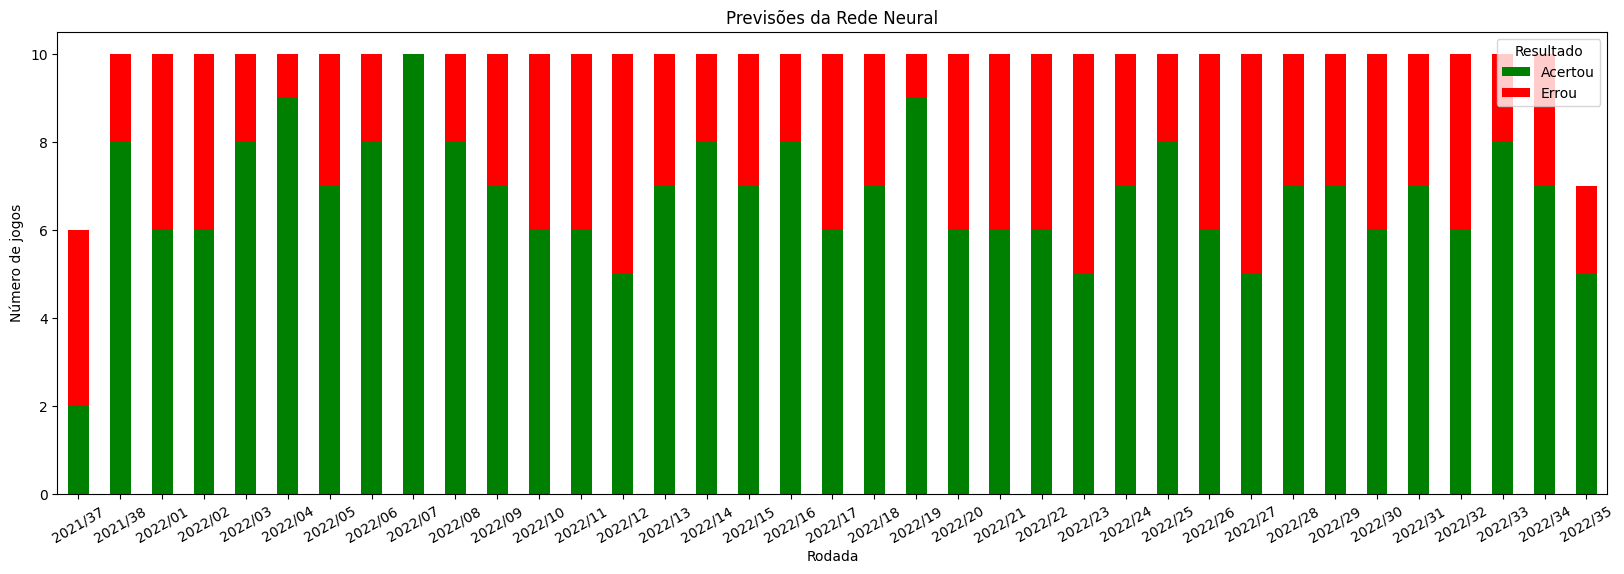

In [ ]:
# cria a coluna "Resultado"
df['Resultado'] = df.apply(lambda x: 'Acertou' if x['Real'] == x['Predicted'] else 'Errou', axis=1)

# agrupa os dados por rodada e conta o número de acertos e erros
resultados_por_rodada = df.groupby('Round')['Resultado'].value_counts().unstack(fill_value=0)

# cria o gráfico de barras
fig, ax = plt.subplots(figsize=(20, 6))

resultados_por_rodada.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

ax.set_xlabel('Rodada')
ax.set_ylabel('Número de jogos')
ax.set_title('Previsões da Rede Neural')
ax.set_xticklabels(resultados_por_rodada.index, rotation=30)

plt.show()

# Alterando modelo para verificar se time da casa ganha ou perde apenas com jogos da Premier League

O intuito desta previsão é para descobrir se a equipe de casa ganha. Para isso foi considerado o empate como uma derrota ( igual a 1 ). Esse estudo é focado para a aposta "empate anula aposta", no qual caso o jogo de empate, a aposta é anulada e o jogador não perde dinheiro.

In [ ]:
new_predict_data_e0 = data.copy()

# Mapear valores FTR para 0=0, 1=1, 2=1
new_htr_map = { 0: 0, 1: 1, 2: 1}
new_predict_data_e0['FTR'] = new_predict_data_e0['FTR'].map(new_htr_map)

new_predict_data_e0["FTR"] = new_predict_data_e0["FTR"].astype(int)

In [ ]:
# cria uma lista para as entradas (X)
new_X_e0 = new_predict_data_e0[['HomeTeam_id', 'AwayTeam_id', 'Wins_Home_Team', 'Wins_Away_Team', 'Loss_Home_Team', 'Loss_Away_Team',
          'Draw_Home_Team', 'Draw_Away_Team', 'Goals_Home_Team', 'Goals_Away_Team', 'Shots_Home_Team', 'Shots_Away_Team',
          'Conceded_Goals_Home_Team', 'Conceded_Goals_Away_Team', 'Matches_Home_Team', 'Matches_Away_Team', 'HomePromoted', 'AwayPromoted']].values

# cria uma lista para as saídas (Y)
new_Y_e0 = new_predict_data_e0['FTR'].values

In [ ]:
Game_id_e0 = new_predict_data_e0[['Game_id', 'HomeTeam', 'AwayTeam', 'Round']]

from sklearn.model_selection import train_test_split

new_game_id_train_e0, new_game_id_test_e0 = train_test_split(Game_id_e0, test_size=0.08, shuffle=False)

new_X_train_e0, new_X_test_e0, new_Y_train_e0, new_Y_test_e0 = train_test_split(new_X_e0, new_Y_e0, test_size=0.08, shuffle=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Normalizar os dados
scaler = MinMaxScaler()

new_X_train_scaler_e0 = scaler.fit_transform(new_X_train_e0)

new_X_test_scaler_e0 = scaler.transform(new_X_test_e0)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

mlp.fit(new_X_train_scaler_e0, new_Y_train_e0)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [ ]:
# Obter as previsões no conjunto de teste
new_Y_pred_e0 = mlp.predict(new_X_test_scaler_e0)

# Converter as previsões e os resultados reais em uma única dimensão
new_Y_test_flat_e0 = new_Y_test_e0.flatten()
new_Y_pred_flat_e0 = new_Y_pred_e0.flatten()

In [ ]:
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score

lr_acc = accuracy_score(new_Y_test_e0, new_Y_pred_e0)
f1 = f1_score(new_Y_test_e0, new_Y_pred_e0, average = 'micro')

print('Regressão Logística')
print('')
print('Acurácia: {:.2f}%'.format(lr_acc*100))
print('F1 Score: {:.2f}%'.format(f1*100))
print('Train score: {:.2f}%'.format(mlp.score(new_X_test_scaler_e0, new_Y_test_e0)*100))

Regressão Logística

Acurácia: 77.69%
F1 Score: 77.69%
Train score: 77.69%


In [ ]:
# Criar um DataFrame com as informações
df = pd.DataFrame({'Round': new_game_id_test_e0['Round'], 'Game_id': new_game_id_test_e0['Game_id'], 'HomeTeam': new_game_id_test_e0['HomeTeam'], 'AwayTeam': new_game_id_test_e0['AwayTeam'], 'Real': new_Y_test_flat_e0, 'Predicted': new_Y_pred_flat_e0})

df.tail(1000)

,Round,Game_id,HomeTeam,AwayTeam,Real,Predicted
4164,2021/37,4165,Leeds,Brighton,1,1
4165,2021/37,4166,Newcastle,Arsenal,0,1
4166,2021/37,4167,Southampton,Liverpool,1,1
4167,2021/37,4168,Everton,Crystal Palace,0,0
4168,2021/37,4169,Aston Villa,Burnley,1,1
...,...,...,...,...,...,...
4522,2022/35,4523,Newcastle,Arsenal,1,1
4523,2022/35,4524,West Ham,Man United,0,1
4524,2022/35,4525,Brighton,Everton,1,1
4525,2022/35,4526,Fulham,Leicester,0,0


In [ ]:
# Adicionar coluna 'Match'
df['Match'] = df['Real'] == df['Predicted']

# Calcular porcentagem de acertos
accuracy = df['Match'].mean() * 100

print(f"A porcentagem de acertos é de {accuracy:.2f}%.")


A porcentagem de acertos é de 77.69%.


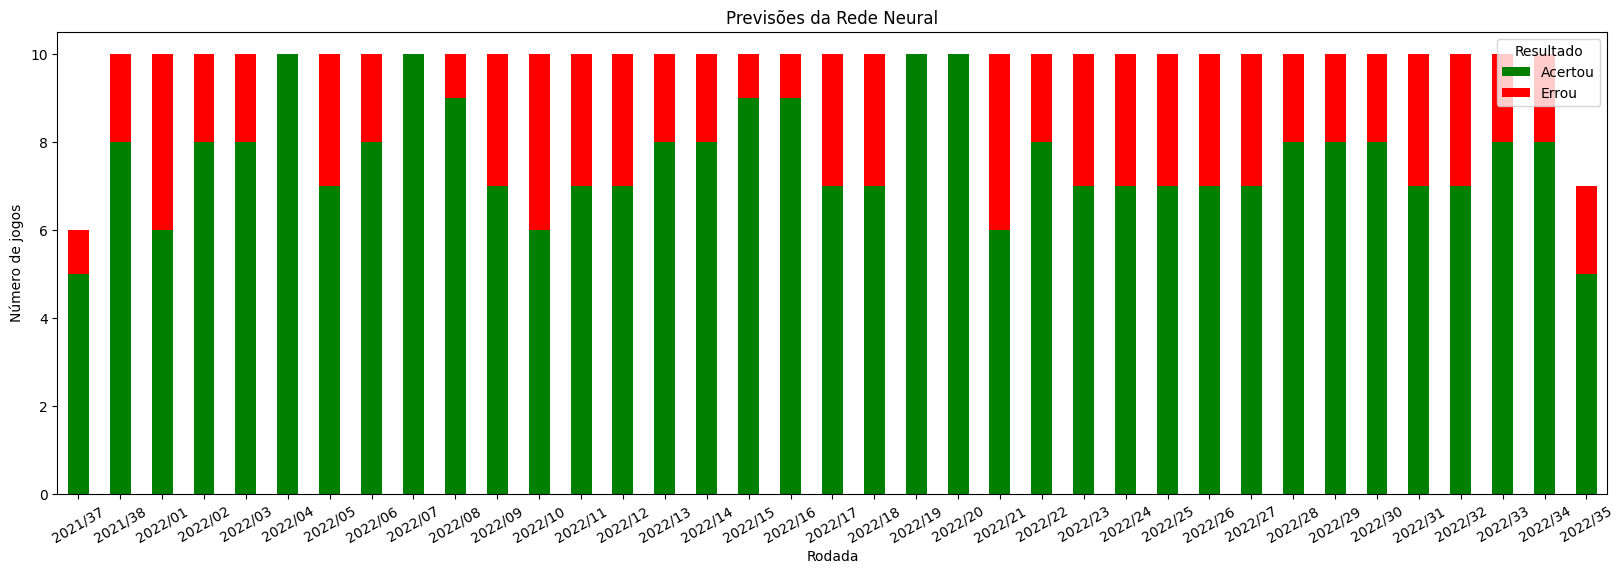

In [ ]:
# cria a coluna "Resultado"
df['Resultado'] = df.apply(lambda x: 'Acertou' if x['Real'] == x['Predicted'] else 'Errou', axis=1)

# agrupa os dados por rodada e conta o número de acertos e erros
resultados_por_rodada = df.groupby('Round')['Resultado'].value_counts().unstack(fill_value=0)

# cria o gráfico de barras
fig, ax = plt.subplots(figsize=(20, 6))

resultados_por_rodada.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

ax.set_xlabel('Rodada')
ax.set_ylabel('Número de jogos')
ax.set_title('Previsões da Rede Neural')
ax.set_xticklabels(resultados_por_rodada.index, rotation=30)

plt.show()